In [1]:
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime
import os

In [5]:
import glob
mountFileName = "../../../Desktop/IRAP_mount/Generative_Adversarial_Network/matrices_CEGAN/"
localFileName = 'matrices_CEGAN/'
autoencoderTraining = "../../../Desktop/IRAP_mount/IonosphericSignalRecontruction/AE_training_results/"
autoencoderTrainingLocal = "../IonosphericSignalRecontruction/AE_training_results/"
filenamesList = glob.glob('../matrices_CEGAN/base*')
baseMatricesList = np.array(filenamesList)
lastEpoch = np.int16((np.round((baseMatricesList.shape[0]/5)*10,0) - 9) // 10 * 10)
print(baseMatricesList[-1])

../matrices_CEGAN/base_16100_5.npy


In [3]:
def DisplayGraphWithInfos(array, infos, title, axs, axy, axn, fig):
    x_lims = list()
    x_lims.append(infos[0]+datetime.timedelta(hours=7))
    x_lims.append(x_lims[0]+datetime.timedelta(days=infos[5]))
    x_lims = mdates.date2num(x_lims)
    axs[axy][axn].xaxis_date()
    axs[axy][axn].imshow(array, origin='lower', cmap=plt.get_cmap('jet') , aspect='auto',extent=[x_lims[0],x_lims[1],infos[2],infos[1]])
    x_lims = mdates.DateFormatter("%H:%M")
    axs[axy][axn].xaxis.set_major_formatter(x_lims)
    axs[axy][axn].set_title("{} - {}/{}/{} - Quiet: {}".format(title, infos[0].year, infos[0].month, infos[0].day, infos[6]))
    axs[axy][axn].set_xlabel("Time")
    axs[axy][axn].set_ylabel("Latitude")
    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('jet'), norm=plt.Normalize(vmin=infos[4], vmax=infos[3]))
    sm._A = []
    clb=fig.colorbar(sm, ax=axs[axy][axn])
    clb.set_label("nT")

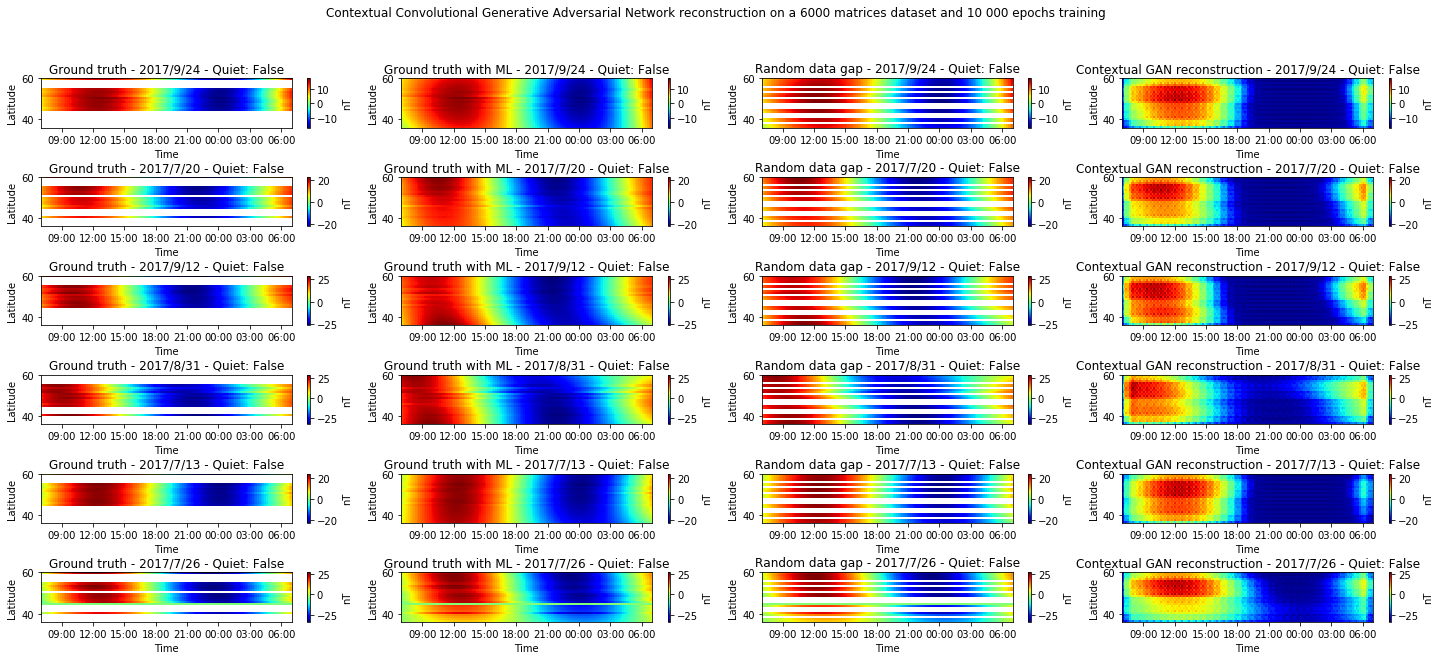

In [8]:
trainingArray = []
epoch = 0

for i in range(0,6):
    AE_saveName = "AE_training_epoch{}_matrix{}.npy".format(epoch, i)
    GAN_saveName = "CEGAN_lines_epoch{}_matrix{}.npy".format(epoch, i)
    trainingArray.append(np.load('{}{}'.format(autoencoderTrainingLocal, AE_saveName), allow_pickle=True, encoding="latin1"))
trainingArray = np.asarray(trainingArray)
    
numberOfPlots = 6
fig, axs = plt.subplots(numberOfPlots,4, figsize=(25, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1., wspace=.15)

axs = axs.ravel().reshape(numberOfPlots,4)

fig.suptitle("Contextual Convolutional Generative Adversarial Network reconstruction on a 6000 matrices dataset and 10 000 epochs training")

for y in range(numberOfPlots):
    DisplayGraphWithInfos(trainingArray[y][0], trainingArray[y][4], "Ground truth", axs, y, 0, fig)
    DisplayGraphWithInfos(trainingArray[y][1], trainingArray[y][4], "Ground truth with ML", axs, y, 1, fig)
    DisplayGraphWithInfos(trainingArray[y][2], trainingArray[y][4], "Random data gap", axs, y, 2, fig)
    DisplayGraphWithInfos(trainingArray[y][3], trainingArray[y][4], "Contextual GAN reconstruction", axs, y, 3, fig)
    
fig.savefig("CGAN_predictions")

In [17]:
from keras.models import load_model, model_from_json
json_file = open('saved_model_CEGAN/generator.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
generator = model_from_json(loaded_model_json)
# load weights into new model
generator.load_weights("saved_model_CEGAN/generator_weights.hdf5")

json_file = open('saved_model_CEGAN/discriminator.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
discriminator = model_from_json(loaded_model_json)
# load weights into new model
discriminator.load_weights("saved_model_CEGAN/discriminator_weights.hdf5")